In [16]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.python import metrics

# Import the dataset and destructure test and train data 

In [17]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data();

print(f"Shape of the data is: {x_train[0].shape}")

Shape of the data is: (28, 28)


# Define a function to accept the predicted target number and return the corresponding item.

In [18]:
def get_item_name(item_number):
  item_dist = {
      "0"	: "T-shirt/top",
      "1":	"Trouser",
      "2":	"Pullover",
      "3":	"Dress",
      "4":	"Coat",
      "5":	"Sandal",
      "6":	"Shirt",
      "7":	"Sneaker",
      "8":	"Bag",
      "9":	"Ankle boot",
  }
  return item_dist[str(item_number)]

# Create a sequential neural network.

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(200, activation="sigmoid"),
    keras.layers.Dense(10, activation="sigmoid")
])

# Compile the model

In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

In [33]:
model.fit(x_train, y_train, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6381 - accuracy: 0.7528
Epoch 2/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6372 - accuracy: 0.7576
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6333 - accuracy: 0.7646
Epoch 4/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6370 - accuracy: 0.7597
Epoch 5/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6369 - accuracy: 0.7608
Epoch 6/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6195 - accuracy: 0.7640
Epoch 7/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6232 - accuracy: 0.7624
Epoch 8/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6254 - accuracy: 0.7612
Epoch 9/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6101 - accuracy: 0.7718
Epoch 10/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.614

# Evaluate the model

In [34]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6056 - accuracy: 0.7763


[0.6055538058280945, 0.7763000130653381]

In [35]:
image_to_predict = model.predict(x_test)
print(x_test.shape)

313/313 [==============================] - 1s 2ms/step
(10000, 28, 28)


In [45]:
test_index = 100;
print(image_to_predict[test_index])
print(f"Predicted: {get_item_name(np.argmax(image_to_predict[test_index]))}")
print(f"Expected: {get_item_name(y_test[test_index])}")

[2.7667454e-07 1.4915911e-07 2.7020498e-08 3.8627200e-05 2.8307735e-08
 4.7500594e-11 4.1577426e-08 1.4329217e-13 3.3227650e-09 7.9994284e-12]
Predicted: Dress
Expected: Dress


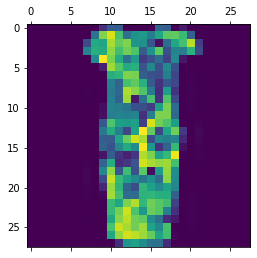

In [46]:
plt.matshow(x_test[test_index].reshape(28,28))